<a href="https://colab.research.google.com/github/Shreedevi-Byahatti/Class-84/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection

In [ ]:
import pandas as pd
import re

google_drive_link = "https://drive.google.com/file/d/1OkVuzkVDGsgU1CdeRqUYQVaSXQ8BuJpr/view?usp=sharing"
file_id = re.search(r"/d/(\w+)/", google_drive_link).group(1)

url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

### Data Processing

Data Information

In [ ]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [ ]:
data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

Data Formatting

In [ ]:
# Convert the "Heart Disease" column to integer values
data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})

### Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Distribution of Heart Disease by Gender

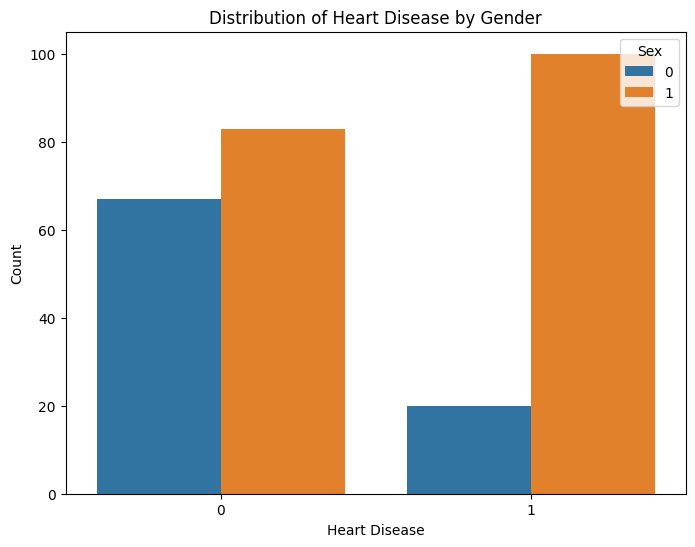

In [ ]:
# Create a countplot to visualize the distribution of heart disease by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', hue='Sex', data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.title('Distribution of Heart Disease by Gender')
plt.show()

Distribution of Heart Disease by Chest Pain Type

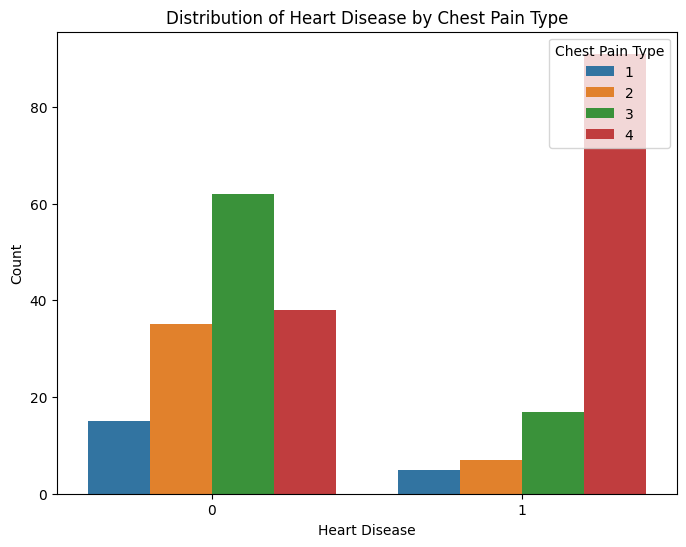

In [ ]:
# Create a countplot to visualize the distribution of heart disease by chest pain type
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', hue='Chest pain type', data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right')
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.show()

Distribution of Chest Pain Type by Gender

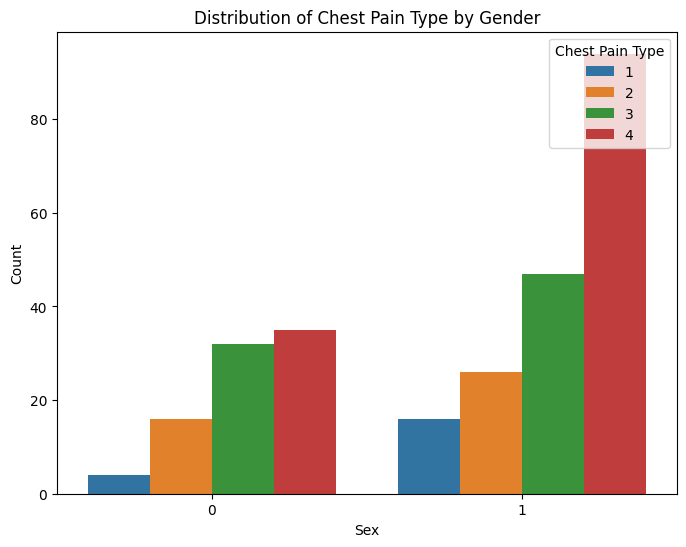

In [ ]:
# Create a countplot to visualize the distribution of chest pain type by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Chest pain type', data=data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right')
plt.title('Distribution of Chest Pain Type by Gender')
plt.show()

Age vs. Sex with Heart Disease

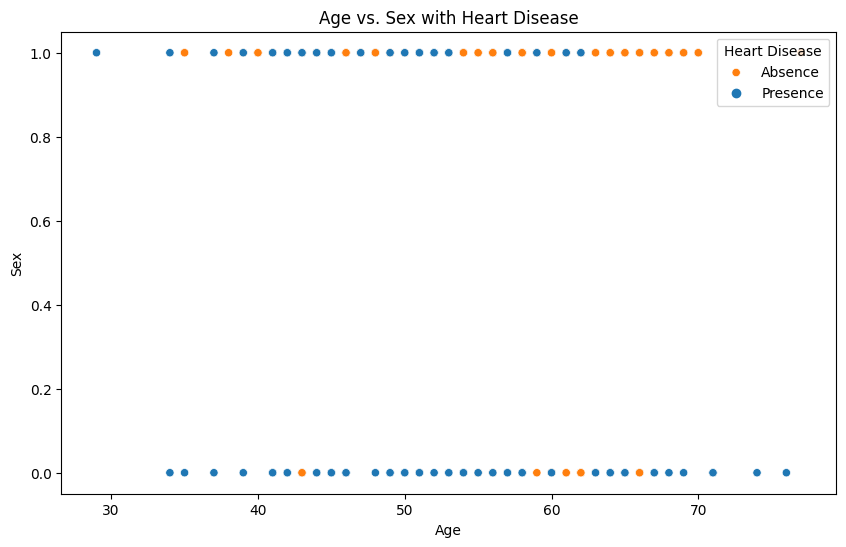

In [ ]:
# Create a scatterplot to visualize the relationship between age, sex, and heart disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Sex'], hue=data['Heart Disease'])
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Age vs. Sex with Heart Disease')
plt.legend(title='Heart Disease', loc='upper right', labels=['Absence', 'Presence'])
plt.show()

 Age vs. ST Depression with Heart Disease

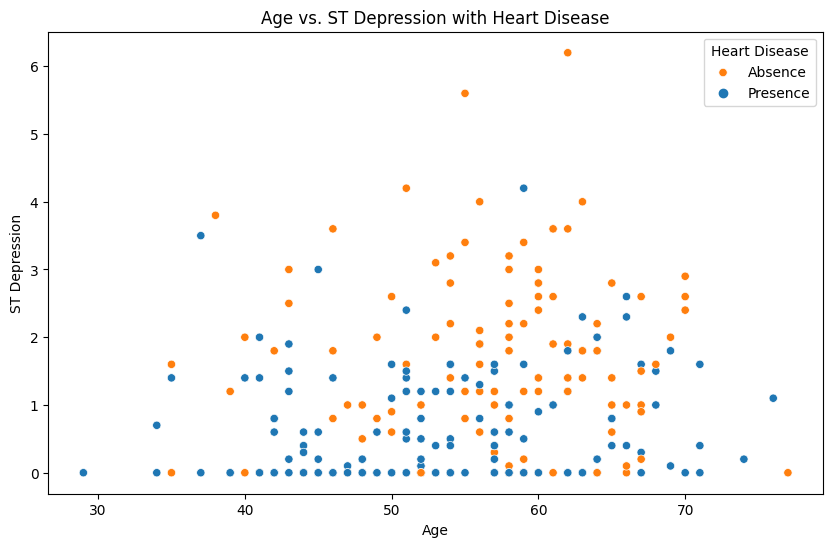

In [ ]:
# Create a scatterplot to visualize the relationship between age, ST depression, and heart disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['ST depression'], hue=data['Heart Disease'])
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.title('Age vs. ST Depression with Heart Disease')
plt.legend(title='Heart Disease', loc='upper right', labels=['Absence', 'Presence'])
plt.show()

Heatmap

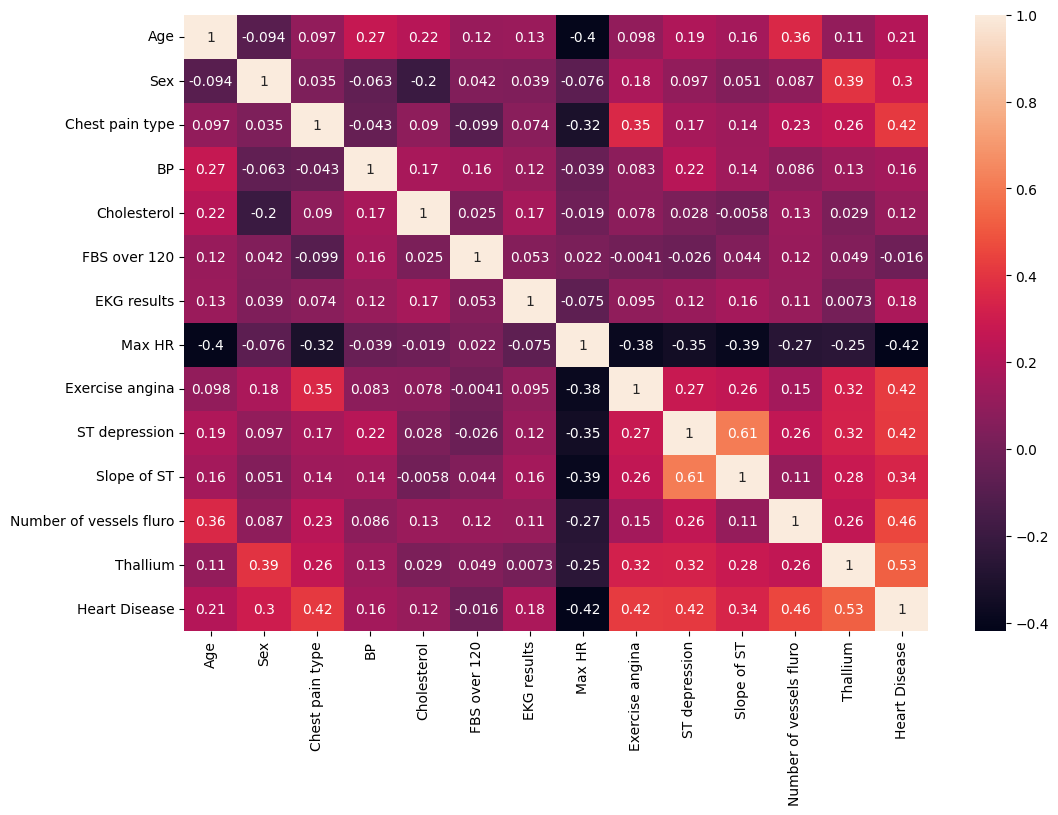

In [ ]:
# Create a figure with a larger size (12x8)
plt.figure(figsize=(12, 8))

# Generate a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(data.corr(), annot=True)

# 'annot=True' adds numerical annotations to the heatmap cells

# Display the heatmap
plt.show()

### Features and Target

In [ ]:
# Define the features (feature) by excluding the target variable
features = data.drop(['Heart Disease'], axis=1)

# Define the target variable (target)
target = data['Heart Disease']

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into a training set (70%) and a testing set (30%)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Model Training

K-Nearest Neighbors (KNN):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(features_train, target_train)

KNeighborsClassifier()

Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier with a specified kernel (e.g., linear)
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(features_train, target_train)

SVC(kernel='linear')

### Model Evaluation

K-Nearest Neighbors (KNN):

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
knn_predictions = knn_classifier.predict(features_test)

# Calculate accuracy
knn_accuracy = accuracy_score(target_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

# Generate a classification report
knn_classification_report = classification_report(target_test, knn_predictions)
print(f'KNN Classification Report:\n{knn_classification_report}')

# Generate a confusion matrix
knn_confusion_matrix = confusion_matrix(target_test, knn_predictions)
print(f'KNN Confusion Matrix:\n{knn_confusion_matrix}')

KNN Accuracy: 0.64
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        49
           1       0.55      0.56      0.55        32

    accuracy                           0.64        81
   macro avg       0.63      0.63      0.63        81
weighted avg       0.64      0.64      0.64        81

KNN Confusion Matrix:
[[34 15]
 [14 18]]


Support Vector Machine (SVM):

In [ ]:
# Make predictions on the test set
svm_predictions = svm_classifier.predict(features_test)

# Calculate accuracy
svm_accuracy = accuracy_score(target_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Generate a classification report
svm_classification_report = classification_report(target_test, svm_predictions)
print(f'SVM Classification Report:\n{svm_classification_report}')

# Generate a confusion matrix
svm_confusion_matrix = confusion_matrix(target_test, svm_predictions)
print(f'SVM Confusion Matrix:\n{svm_confusion_matrix}')

SVM Accuracy: 0.83
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.85      0.69      0.76        32

    accuracy                           0.83        81
   macro avg       0.83      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81

SVM Confusion Matrix:
[[45  4]
 [10 22]]


### Prediction

In [ ]:
# Create a dictionary to map feature names to their corresponding values
single_data_point_dict = {
    'Age': 57,
    'Sex': 1,
    'Chest pain type': 2,
    'BP': 124,
    'Cholesterol': 261,
    'FBS over 120': 0,
    'EKG results': 0,
    'Max HR': 141,
    'Exercise angina': 0,
    'ST depression': 0.3,
    'Slope of ST': 1,
    'Number of vessels fluro': 0,
    'Thallium': 7
}

# Create a Pandas DataFrame from the dictionary
single_data_point_df = pd.DataFrame([single_data_point_dict])

# Use the trained SVM model to make a prediction
svm_prediction = svm_classifier.predict(single_data_point_df)

# Interpret the prediction
if svm_prediction[0] == 1:
    prediction_result = "Presence of Heart Disease"
else:
    prediction_result = "Absence of Heart Disease"

# Print the prediction result
print(f"Prediction Result: {prediction_result}")

Prediction Result: Absence of Heart Disease
